# **MACHINE PREDICTIVE MAINTENANCE**

# **Business Understanding**

## **Overview**
Manufacturing industries rely heavily on equipment that must operate efficiently and continuously to meet production targets. Unplanned machine failures result in costly downtime, repair expenses, and lost productivity. Traditional maintenance strategies—either reactive (fix after failure) or preventive (scheduled maintenance)—often lead to inefficiencies, either by acting too late or too early.

Predictive maintenance uses historical and real-time sensor data to anticipate equipment failures before they occur, enabling timely interventions that minimize downtime and extend asset life.

## **Problem Statement**
The company currently experiences production losses due to unexpected machine failures. While sensor data is available, it is not being fully leveraged to predict when a failure is imminent or what kind of failure it will be.

The problem is twofold:

1. **Binary Failure Prediction:** Determine whether a machine is likely to fail in the near future based on sensor readings.

2. **Failure Type Classification:** If a failure is likely, identify the most probable cause to facilitate targeted maintenance.

## **Project Objectives**

### **Primary Objectives:**

1. Develop a binary classification model to predict machine failure (Target: 0 = No Failure, 1 = Failure).

2. Develop a multiclass classification model to predict the type of failure (Failure Type).

### **Secondary Objectives:**

1. Perform Exploratory Data Analysis (EDA) to uncover key drivers of failure.

2. Rank the importance of sensor features contributing to failure.

3. Build a real-time or batch scoring system for predictive alerts.

## **Metrics for Success**
### **Technical Metrics**

**Task	Metric	Description**

1. Binary Classification	Accuracy, Recall, F1-score,

- Evaluate prediction performance; F1 is crucial due to class imbalance.

2. Multiclass Classification	Accuracy, Macro F1-score,

- Confusion Matrix	Ensure the model correctly distinguishes failure types.

- Feature Selection	SHAP, Permutation Importance	Understand feature contribution to failures.


### **Business Metrics**
For measuring real-world impact:

- Reduction in unplanned downtime (%)

- Cost savings from optimized maintenance schedules ($)

- Improvement in maintenance planning efficiency (e.g., timely interventions)

- Reduction in failure rate (%) over time

# **Data Understanding**

## **Dataset Overview**
The dataset consists of 10,000 records and 10 columns, collected from manufacturing machines equipped with various sensors. Each row represents a machine log entry with associated sensor readings and failure information.

### **Feature Summary**
1. UDI: Unique identifier for each record.
2. Product ID: Serial number identifying each machine or product.
3. Type: Category of the product or machine — typically ‘L’ (light), ‘M’ (medium), or ‘H’ (heavy) load.
4. Air temperature [K]: Ambient air temperature measured in Kelvin.
5. Process temperature [K]: Internal temperature of the machine during processing, in Kelvin.
6. Rotational speed [rpm]: Speed of the machine's rotation in revolutions per minute.
7. Torque [Nm]: Torque applied by the machine in Newton-meters.
8. Tool wear [min]: Total time (in minutes) the tool has been used, contributing to wear.
9. Target: Binary indicator of failure — 0 for no failure, 1 for failure.
10. Failure Type: Categorical label of failure cause (e.g., Tool Wear, Overstrain, Power Failure, etc.).



## **Exploring the Dataset**



In [80]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
#Loading the dataset
df = pd.read_csv('predictive_maintenance.csv')
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [82]:
df.shape

(10000, 10)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [84]:
df.describe().T

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0

In [85]:
df.describe(include='object').T

count unique         top  freq
Product ID    10000  10000      L57163     1
Type          10000      3           L  6000
Failure Type  10000      6  No Failure  9652

In [86]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [87]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

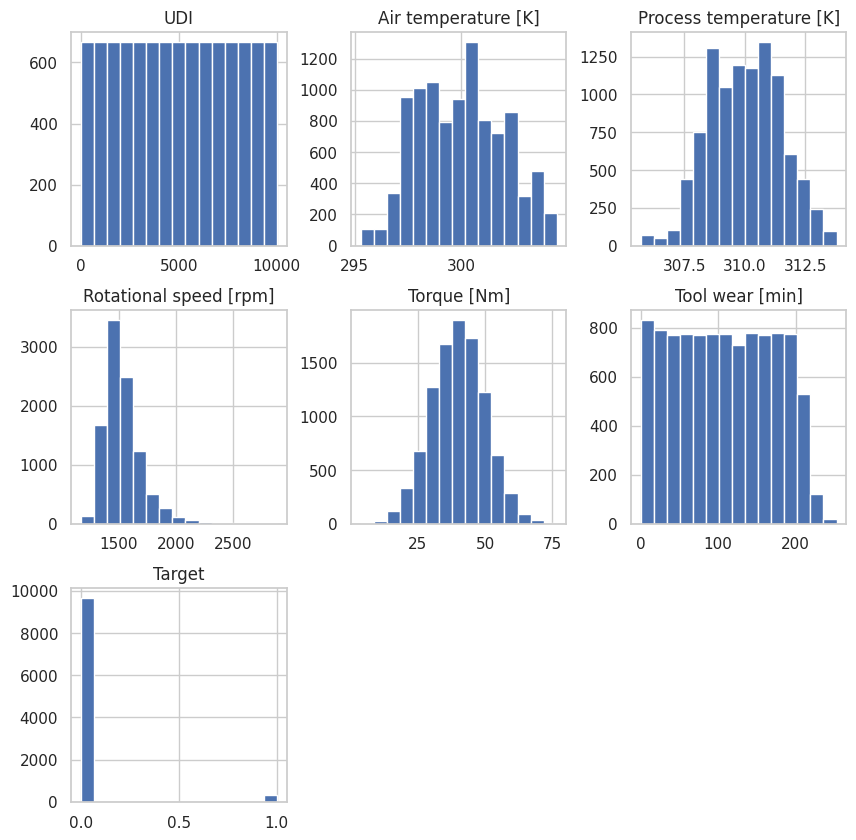

In [88]:
df.hist(bins=15,figsize=(10,10))
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'UDI'),
  Text(1, 0, 'Air temperature [K]'),
  Text(2, 0, 'Process temperature [K]'),
  Text(3, 0, 'Rotational speed [rpm]'),
  Text(4, 0, 'Torque [Nm]'),
  Text(5, 0, 'Tool wear [min]'),
  Text(6, 0, 'Target')])

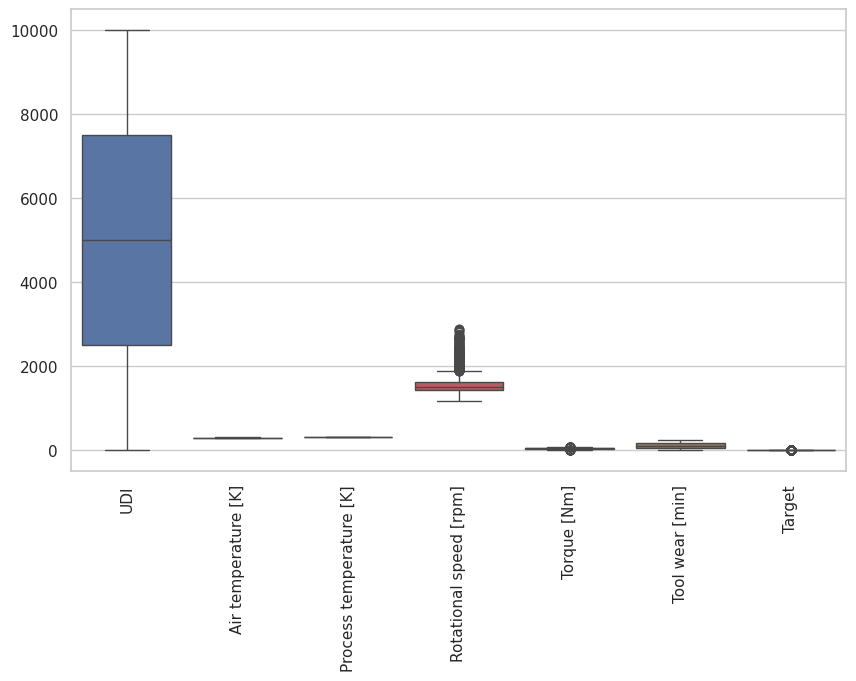

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# **Data Preparation**



## **Data Cleaning**

In [90]:
# dropping unnecessary columns
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [91]:
#Changing columns format
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.lower()

In [92]:
#Confirm changes
df.head()

type  air_temperature_[k]  process_temperature_[k]  rotational_speed_[rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   torque_[nm]  tool_wear_[min]  target failure_type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure

## **Feature Engineering**



In [93]:
# Temperature difference
df['temp_diff'] = (df['process_temperature_[k]']) - (df['air_temperature_[k]'])

# Torque speed interaction
df['torque_speed_interaction'] = (df['torque_[nm]']) * (df['rotational_speed_[rpm]'])

In [94]:
#Confirm changes
df.columns

Index(['type', 'air_temperature_[k]', 'process_temperature_[k]',
       'rotational_speed_[rpm]', 'torque_[nm]', 'tool_wear_[min]', 'target',
       'failure_type', 'temp_diff', 'torque_speed_interaction'],
      dtype='object')

In [95]:
df['failure_type'].value_counts()

failure_type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

## **Exploratory Data Analysis**

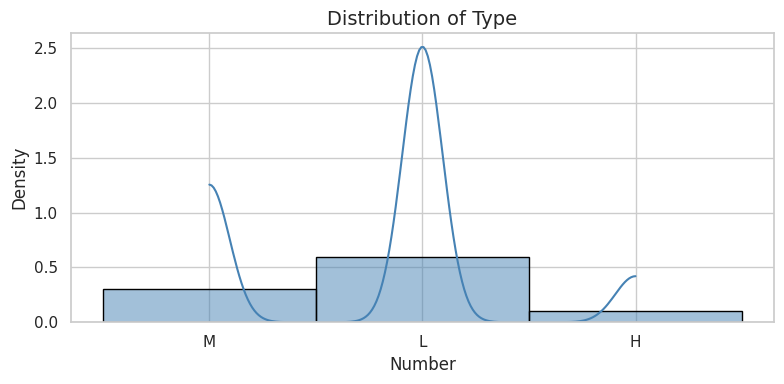

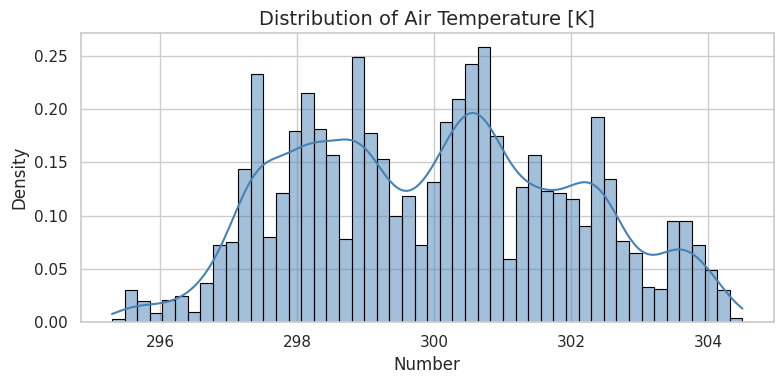

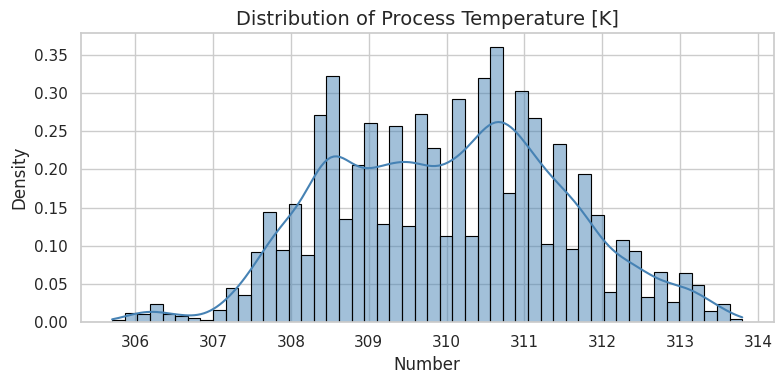

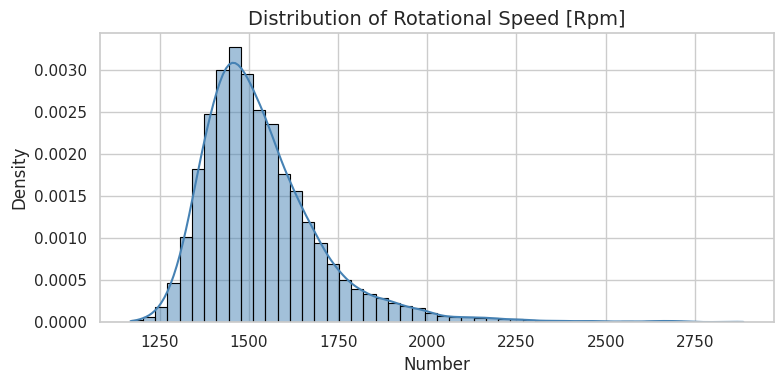

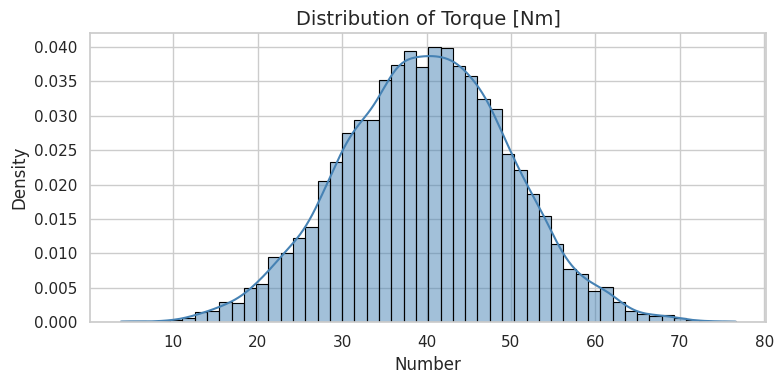

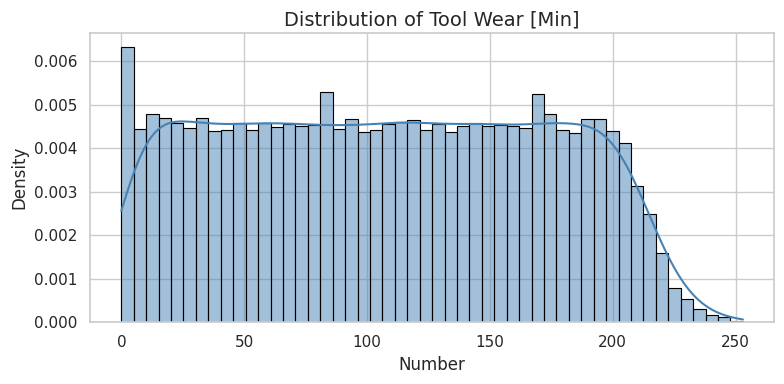

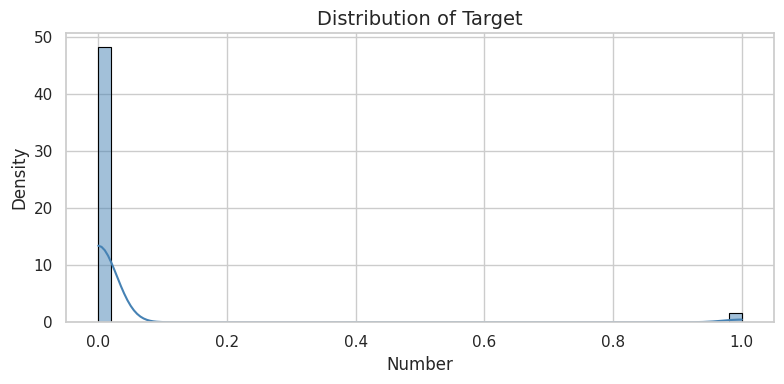

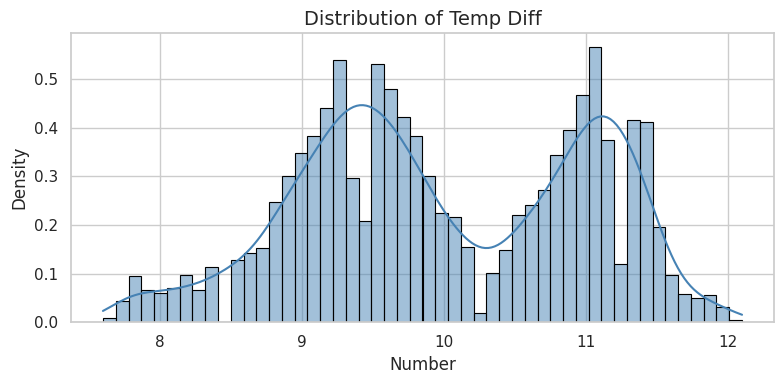

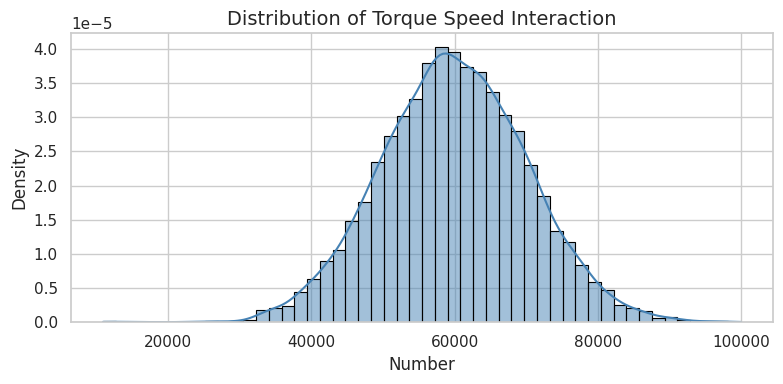

In [96]:
# Numeric distributions

numeric_columns = [
    'type', 'air_temperature_[k]', 'process_temperature_[k]',
       'rotational_speed_[rpm]', 'torque_[nm]', 'tool_wear_[min]', 'target',
    'temp_diff', 'torque_speed_interaction'
]

# Set style
sns.set(style="whitegrid")

# Loop: one figure per injury column
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].fillna(0), bins=50, kde=True, stat="density", color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel("Number", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()


**Observations**
- Most numerical features show a roughly unimodal distribution.

- rotational_speed_[rpm] and torque_[nm] appear to have wider ranges and potentially some outliers or distinct modes, which might be worth investigating further.

- The newly engineered features, temp_diff and torque_speed_interaction, also show their distributions.

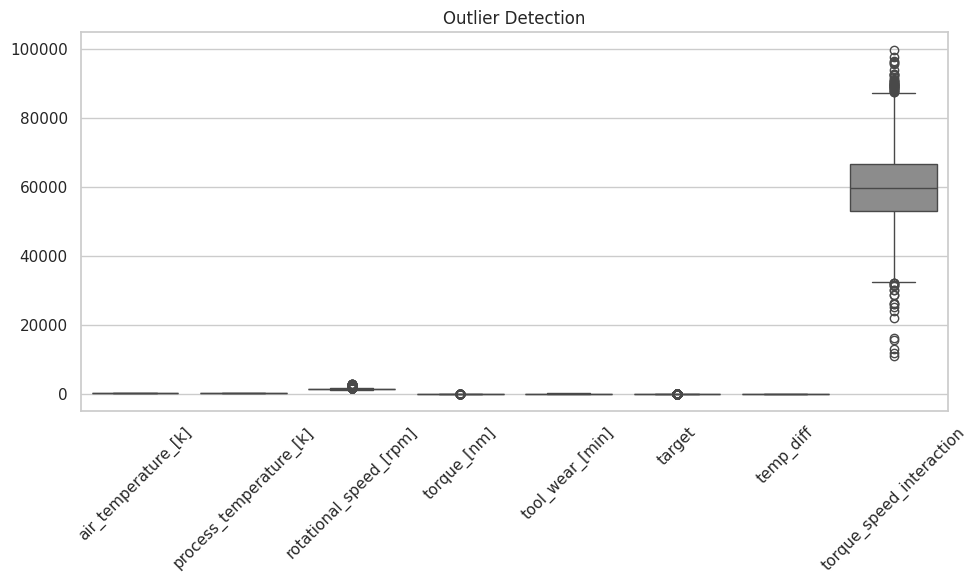

In [97]:
#Outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Outlier Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**

- The boxplot clearly highlights the presence of outliers in several numerical features, particularly rotational_speed_[rpm], torque_[nm], and tool_wear_[min].

- The engineered features, temp_diff and torque_speed_interaction, also show a number of outliers. These outliers might be genuine operational extremes or data errors and should be considered when building models.

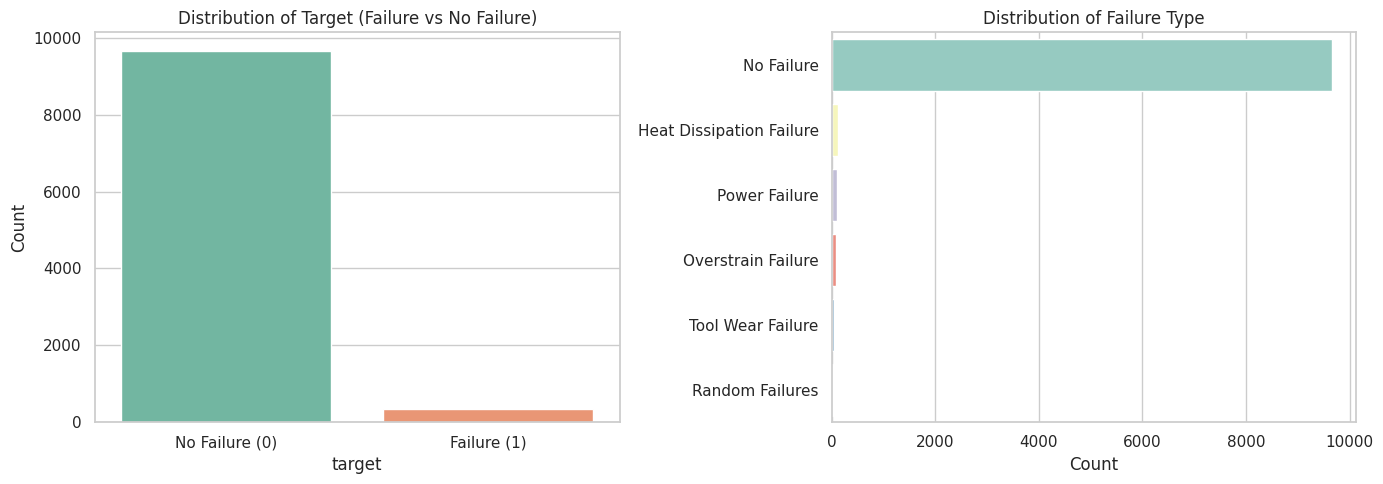

In [98]:
# Set plot style
sns.set(style="whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Distribution of Target
sns.countplot(data=df, x='target', ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Target (Failure vs No Failure)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Failure (0)', 'Failure (1)'])
axes[0].set_ylabel('Count')

# Plot 2: Distribution of Failure Type
sns.countplot(data=df, y='failure_type', order=df['failure_type'].value_counts().index, ax=axes[1], palette='Set3')
axes[1].set_title('Distribution of Failure Type')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')

# Improve layout
plt.tight_layout()
plt.show()

**Observations**
- The 'Distribution of Target' plot shows a significant class imbalance. The number of instances with 'No Failure' (0) is much higher than those with 'Failure' (1). This imbalance will need to be addressed during model training (e.g., using techniques like oversampling, undersampling, or using appropriate evaluation metrics like F1-score).

- The 'Distribution of Failure Type' plot reveals that 'No Failure' is the most frequent category, which is consistent with the target distribution. Among the failure types, 'Heat Dissipation Failure' and 'Power Failure' appear to be the most common, while 'Random Failures' and 'Tool Wear Failure' are less frequent, and 'Overstrain Failure' is the least frequent. This imbalance in failure types also needs to be considered for the multiclass classification task.

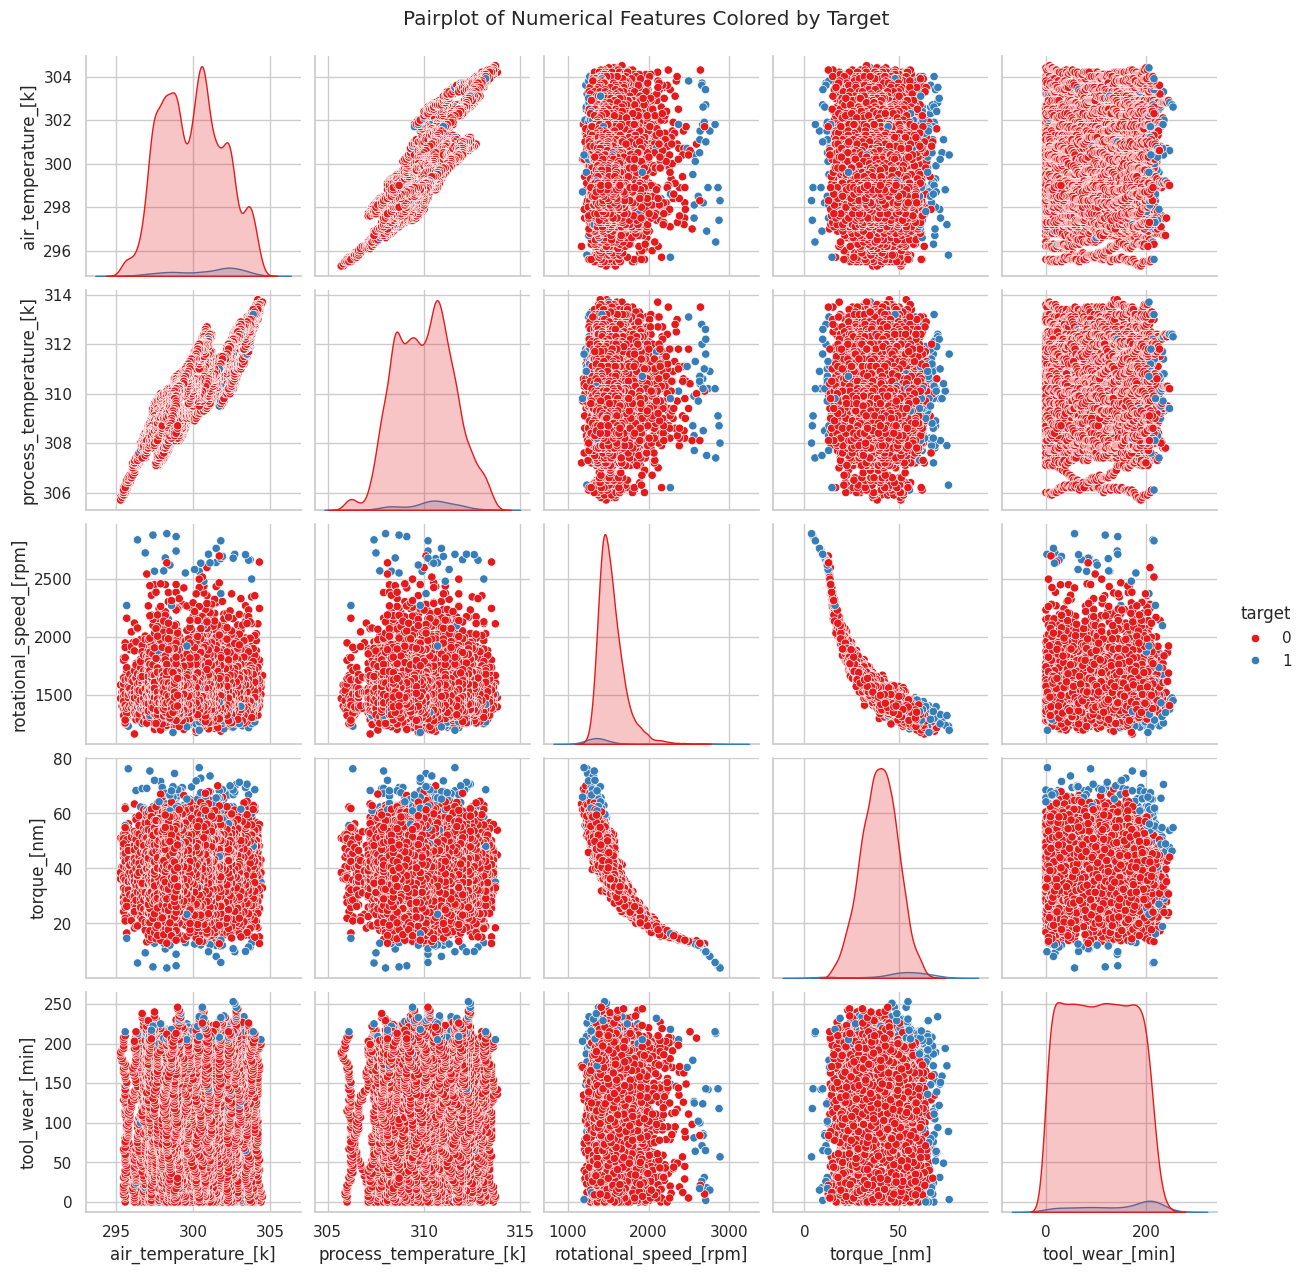

In [99]:
# Select numerical features for the pairplot
numeric_features = [
    'air_temperature_[k]',
    'process_temperature_[k]',
    'rotational_speed_[rpm]',
    'torque_[nm]',
    'tool_wear_[min]'
]

# Plot pairplot with hue based on failure (Target)
sns.pairplot(df[numeric_features + ['target']], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features Colored by Target', y=1.02)
plt.show()

**Observations**

- This pairplot helps visualize relationships between numerical features, colored by the 'target' variable (Failure or No Failure).

- It's difficult to see clear linear separations between the 'Failure' (orange) and 'No Failure' (blue) instances in most scatter plots, suggesting that simple linear models might not fully capture the relationships.

- Some features, like tool_wear_[min], show some separation or different distributions based on the target, indicating they might be important predictors.

- The diagonal KDE plots show the distribution of each feature for both target classes. This can reveal if the distribution of a feature is significantly different for failed vs. non-failed instances.

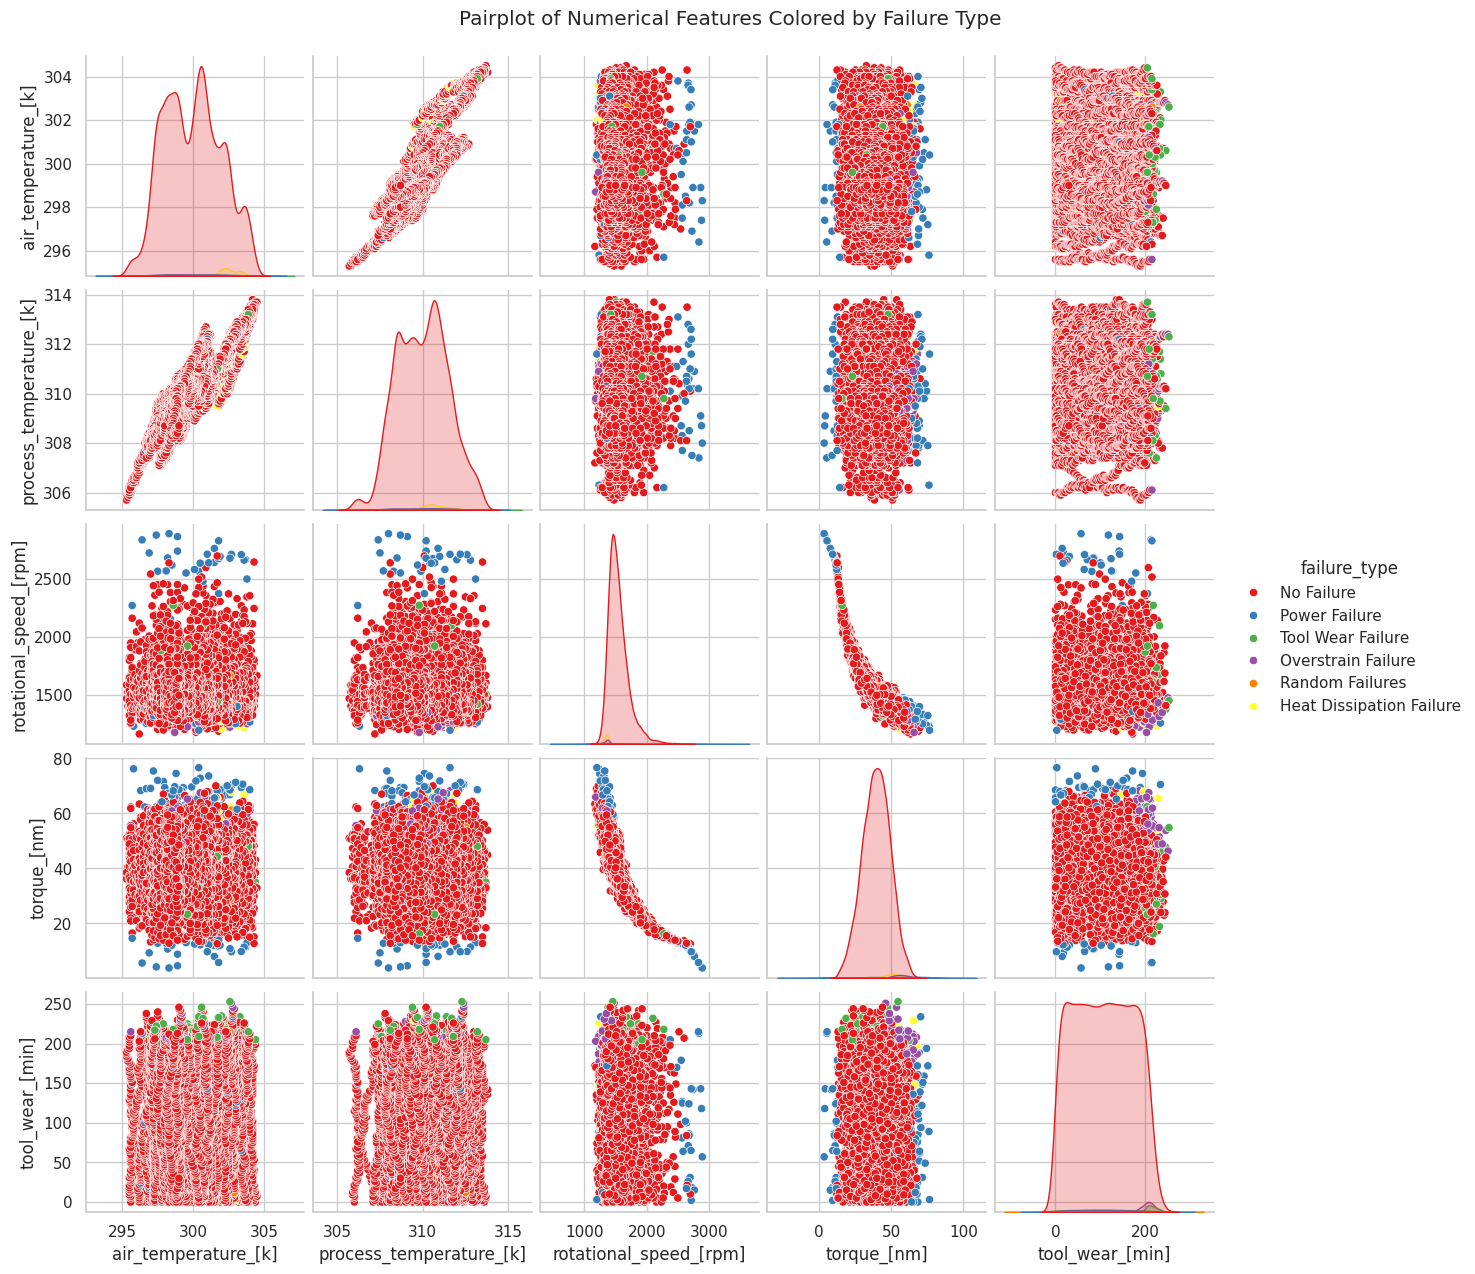

In [100]:
# Select numerical features for the pairplot
numeric_features = [
    'air_temperature_[k]',
    'process_temperature_[k]',
    'rotational_speed_[rpm]',
    'torque_[nm]',
    'tool_wear_[min]'
]

# Plot pairplot with hue based on failure (Failure Type)
sns.pairplot(df[numeric_features + ['failure_type']], hue='failure_type', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features Colored by Failure Type', y=1.02)
plt.show()

**Observations**

- This pairplot extends the analysis to visualize relationships between numerical features, colored by the specific 'failure_type'.

- Different failure types seem to occupy different regions or show different patterns in the scatter plots. For example, 'Tool Wear Failure' seems to be associated with higher 'tool_wear_[min]' values, which is intuitive.

- 'Heat Dissipation Failure' might be related to temperature readings.
'Power Failure' and 'Overstrain

- Failure' might be linked to torque_[nm] or rotational_speed_[rpm].

- This plot is crucial for understanding which features are most discriminative for different types of failures, which will be valuable for the multiclass classification model.

## Data Preprocessing


In [101]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['failure_type']=le.fit_transform(df['failure_type'])


In [102]:
# Split the data to train and test using train_test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Separate the features from the target
X = df.drop(['target','failure_type'],axis=1)
y = df['target'].astype(int)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [103]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create SMOTE + Logistic Regression pipeline
lr_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

# Train and evaluate
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print(" Logistic Regression with SMOTE")
print(classification_report(y_test, y_pred_lr))


 Logistic Regression with SMOTE
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1939
           1       0.16      0.80      0.27        61

    accuracy                           0.87      2000
   macro avg       0.58      0.84      0.60      2000
weighted avg       0.97      0.87      0.91      2000



In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1939
           1       0.96      0.72      0.82        61

    accuracy                           0.99      2000
   macro avg       0.97      0.86      0.91      2000
weighted avg       0.99      0.99      0.99      2000



In [105]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))


XGBoost
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.69      0.76        61

    accuracy                           0.99      2000
   macro avg       0.92      0.84      0.88      2000
weighted avg       0.99      0.99      0.99      2000



In [106]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.77      0.38      0.51        61

    accuracy                           0.98      2000
   macro avg       0.87      0.69      0.75      2000
weighted avg       0.97      0.98      0.97      2000



In [107]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_overfitting(model, X_train, y_train, X_test, y_test, model_name=""):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"\n {model_name} Evaluation:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:     {test_acc:.4f}")
    print(f"Training F1 Score: {train_f1:.4f}")
    print(f"Test F1 Score:     {test_f1:.4f}")

    if train_acc - test_acc > 0.1:
        print(" Potential overfitting.")
    elif test_acc - train_acc > 0.1:
        print(" Potential underfitting.")
    else:
        print(" Model generalizes well.")


In [108]:
# Extract trained logistic regression model
lr_model = lr_pipeline.named_steps['lr']

# Resample train data for proper comparison (SMOTE was applied inside pipeline)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Evaluate
evaluate_overfitting(lr_model, X_train_smote, y_train_smote, X_test, y_test, model_name="Logistic Regression (SMOTE)")



 Logistic Regression (SMOTE) Evaluation:
Training Accuracy: 0.8561
Test Accuracy:     0.8700
Training F1 Score: 0.8553
Test F1 Score:     0.2737
 Model generalizes well.


In [109]:
evaluate_overfitting(rf, X_train, y_train, X_test, y_test, model_name="Random Forest")



 Random Forest Evaluation:
Training Accuracy: 1.0000
Test Accuracy:     0.9905
Training F1 Score: 1.0000
Test F1 Score:     0.8224
 Model generalizes well.


In [110]:
evaluate_overfitting(xgb, X_train, y_train, X_test, y_test, model_name="XGBoost")



 XGBoost Evaluation:
Training Accuracy: 1.0000
Test Accuracy:     0.9870
Training F1 Score: 1.0000
Test F1 Score:     0.7636
 Model generalizes well.


In [111]:
evaluate_overfitting(svm, X_train, y_train, X_test, y_test, model_name="SVM")



 SVM Evaluation:
Training Accuracy: 0.9799
Test Accuracy:     0.9775
Training F1 Score: 0.6120
Test F1 Score:     0.5055
 Model generalizes well.


In [112]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print("Best Random Forest Parameters:", rf_grid.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [113]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

xgb_param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=30,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

xgb_random.fit(X_train, y_train)
best_xgb = xgb_random.best_estimator_

print(" Best XGBoost Parameters:", xgb_random.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
 Best XGBoost Parameters: {'colsample_bytree': np.float64(0.7604171300129119), 'learning_rate': np.float64(0.29835160730480476), 'max_depth': 7, 'n_estimators': 181, 'subsample': np.float64(0.7698460661945399)}


In [114]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=svm_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

print("Best SVM Parameters:", svm_grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.90      0.75      0.82        61

    accuracy                           0.99      2000
   macro avg       0.95      0.88      0.91      2000
weighted avg       0.99      0.99      0.99      2000



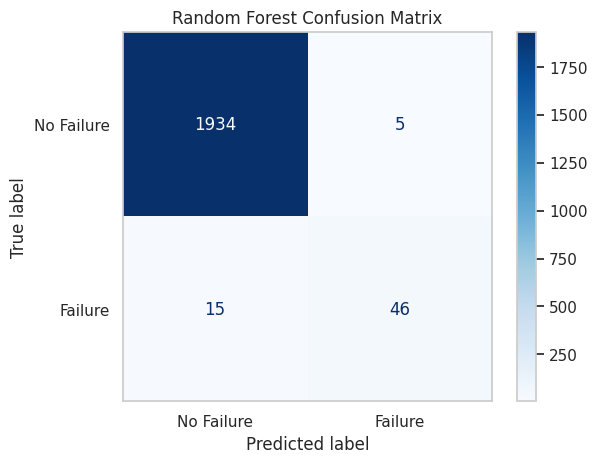

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict
y_pred_rf = best_rf.predict(X_test)

# Report
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, display_labels=["No Failure", "Failure"], cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()


**Classification Report Insights**

**a) Recall:**
1. Class 0 (Majority): 1.00
→ The model correctly identified all instances of class 0. No false negatives.

2. Class 1 (Minority): 0.75
→ The model missed 25% of actual class 1 cases. This indicates that some failures (or minority events) are not being captured, which could be critical depending on the use case.

**b) F1-Score:**
1. Class 0: 0.99
→ Near perfect balance of precision and recall for the majority class.

2. Class 1: 0.82
→ Shows a good but not perfect balance of precision (0.90) and recall (0.75). It reflects that while most predicted failures are correct, some actual failures are being missed.

**c) Accuracy**

Overall Accuracy: 0.99
→ The model performs very well overall, but this high value is heavily influenced by the majority class (class 0). It can be misleading in imbalanced datasets because it hides poor performance on the minority class.



**RF Confusion Matrix Observations**

1. Correct Predictions (Diagonal):

- True Negatives (No Failure correctly predicted as No Failure): 1934 instances. This is a very high number, indicating excellent performance in identifying "No Failure" cases.
- True Positives (Failure correctly predicted as Failure): 46 instances.

2. Incorrect Predictions (Off-Diagonal):
- False Positives (No Failure incorrectly predicted as Failure): 5 instances. This is a very low number, suggesting the model rarely misclassifies "No Failure" cases as "Failure."
- False Negatives (Failure incorrectly predicted as No Failure): 15 instances. This means the model failed to detect "Failure" in 15 cases where it actually occurred.

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.87      0.74      0.80        61

    accuracy                           0.99      2000
   macro avg       0.93      0.87      0.90      2000
weighted avg       0.99      0.99      0.99      2000



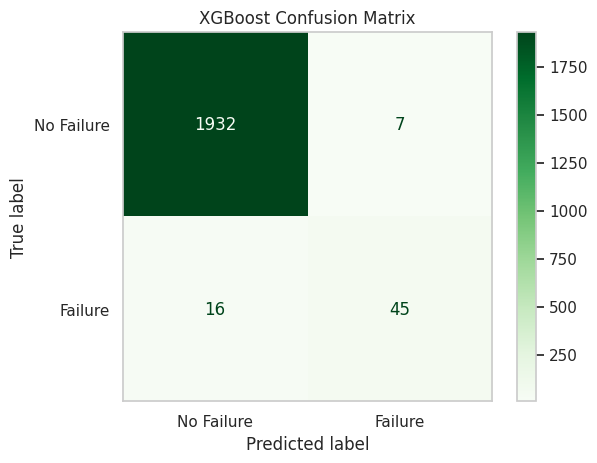

In [116]:
y_pred_xgb = best_xgb.predict(X_test)

print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test, display_labels=["No Failure", "Failure"], cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.grid(False)
plt.show()


**Classification Report Insights**

**a) Recall**

1. Class 0 (Majority): 1.00
→ Perfect recall: all normal/no-failure cases were correctly identified.

2. Class 1 (Minority): 0.74
→ About 26% of actual failures were missed by the model, which could be risky in sensitive applications like predictive maintenance.

**b) F1-Score**

1. Class 0: 0.99
→ Excellent performance in identifying and predicting class 0.

2. Class 1: 0.80
→ Slightly lower than in Random Forest, indicating some imbalance between precision (0.87) and recall (0.74). Still a respectable performance, but leaves room for improvement in capturing actual failure cases.

**c) Accuracy**

Overall Accuracy: Not explicitly shown, but from support values it would be ~99%, similar to Random Forest.

**XGB confusion matrix observations**

- True Negatives (No Failure correctly predicted as No Failure): 1932 instances. Very high, similar to the previous Random Forest model.
- True Positives (Failure correctly predicted as Failure): 45 instances.
- False Positives (No Failure incorrectly predicted as Failure): 7 instances. Slightly higher than the Random Forest model's 5 false positives.
- False Negatives (Failure incorrectly predicted as No Failure): 16 instances. Slightly higher than the Random Forest model's 15 false negatives.

- Overall Comparison to Previous Random Forest: The XGBoost model shows very similar performance to the Random Forest model, with slightly more false positives (7 vs 5) and false negatives (16 vs 15). Both models excel at identifying "No Failure" but still struggle somewhat with detecting "Failure" cases, resulting in similar numbers of missed failures. The dataset imbalance is also evident here.

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.78      0.57      0.66        61

    accuracy                           0.98      2000
   macro avg       0.88      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000



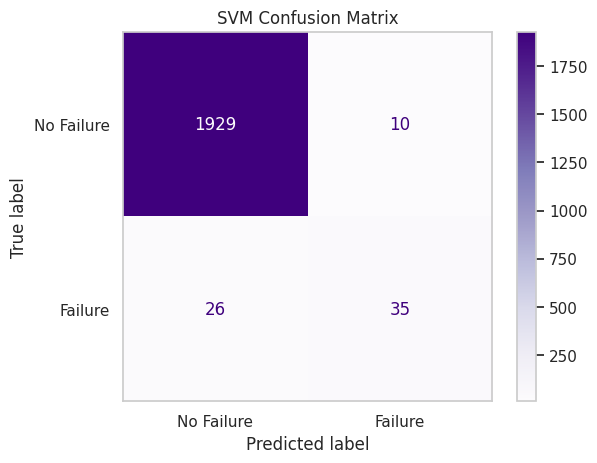

In [117]:
y_pred_svm = best_svm.predict(X_test)

print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, display_labels=["No Failure", "Failure"], cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.grid(False)
plt.show()


**SVM classification report insights**

**a) Recall**
1. Class 0 (Majority): 0.99
→ The model correctly identified nearly all normal/no-failure cases.

2. Class 1 (Minority): 0.57
→ Very low recall: 43% of actual failures were missed. This is concerning for failure detection.

**b) F1-Score**
1. Class 0: 0.99
→ Strong, consistent performance on the dominant class.

2. Class 1: 0.66
→ Indicates poor balance between precision (0.78) and recall (0.57). The model is better at predicting failures when it does, but it fails to detect a significant portion of actual failures.

**c) Accuracy**
Overall accuracy is ~99%, but again, this is misleading due to the class imbalance.
→ The model performs well overall only because class 0 dominates the data.

**SVM confusion matrix observations**

- True Negatives (No Failure correctly predicted as No Failure): 1929 instances. Very high, consistent with the previous models.
- True Positives (Failure correctly predicted as Failure): 35 instances. This is noticeably lower than both the Random Forest (46) and XGBoost (45) models.
- False Positives (No Failure incorrectly predicted as Failure): 10 instances. This is the highest number of false positives among the three models (Random Forest: 5, XGBoost: 7).
- False Negatives (Failure incorrectly predicted as No Failure): 26 instances. This is significantly higher than both the Random Forest (15) and XGBoost (16) models.

- Overall Comparison: The SVM model appears to perform the worst among the three models in terms of identifying "Failure" cases. It has fewer true positives for "Failure" and considerably more false negatives (missed failures) and false positives compared to both the Random Forest and XGBoost models. This suggests the SVM model is less effective at correctly classifying "Failure" instances and is also more prone to misclassifying "No Failure" instances as "Failure."

In [118]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using soft voting
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),

    ],
    voting='soft',  # use 'soft' to average predicted probabilities
    n_jobs=-1
)

# Fit ensemble
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     max_features='log2',
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=np.float64(0.7604171300129119),
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='loglos...
                                            interaction_constraints=None,
                                            learning_rate=np.float64(0.29835160730480476),
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=181, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 n_jobs=-1, voting='soft')

Ensemble Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1939
           1       0.92      0.75      0.83        61

    accuracy                           0.99      2000
   macro avg       0.96      0.88      0.91      2000
weighted avg       0.99      0.99      0.99      2000



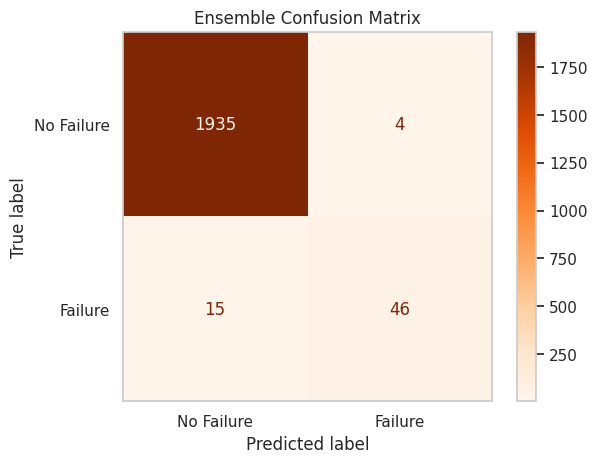

In [119]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Predict
y_pred_ensemble = ensemble_model.predict(X_test)

# Report
print("Ensemble Classification Report:\n")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(ensemble_model, X_test, y_test, display_labels=["No Failure", "Failure"], cmap="Oranges")
plt.title("Ensemble Confusion Matrix")
plt.grid(False)
plt.show()


**Ensemble Model Classification Report insights**

**a) Recall**

1. Class 0 (Normal): 1.00
→ The ensemble model correctly identified all normal/no-failure cases.

2. Class 1 (Failure): 0.75
→ A significant improvement over the SVM (0.57) and slightly better than XGBoost (0.74). The model correctly identified 75% of actual failures, which is solid considering the imbalance.

**b) F1-Score**

1. Class 0: 1.00
→ Perfect balance between precision and recall for the majority class.

2. Class 1: 0.83
→ This is the highest F1-score for the failure class among all models so far (Random Forest: 0.82, XGBoost: 0.80, SVM: 0.66). This suggests the ensemble provides the best overall balance for failure detection.

**c) Accuracy**

Overall accuracy is 99%, but more importantly, it achieves this while maintaining a relatively high recall and F1-score for the failure class.
→ This makes it the most balanced and effective model for detecting both normal and failure cases in your binary setup.



**Ensemble Model Confusion Matrix observations**

- True Negatives (No Failure correctly predicted as No Failure): 1935 instances. This is the highest number of correctly predicted "No Failure" instances among all models reviewed.
T- rue Positives (Failure correctly predicted as Failure): 46 instances. This is tied with the Random Forest model for the highest number of correctly predicted "Failure" instances.
- False Positives (No Failure incorrectly predicted as Failure): 4 instances. This is the lowest number of false positives among all models reviewed, indicating very few instances where "No Failure" was wrongly flagged as "Failure."
- False Negatives (Failure incorrectly predicted as No Failure): 15 instances. This is tied with the Random Forest model for the lowest number of false negatives, meaning it missed fewer actual "Failure" events.

Overall Comparison: The Ensemble model demonstrates very strong performance, particularly excelling in minimizing false positives while maintaining a high number of true positives and relatively low false negatives. Compared to the individual Random Forest, XGBoost, and SVM models, the Ensemble model appears to be the most balanced and effective in this classification task, especially in correctly identifying "No Failure" and having fewer critical errors (false negatives).

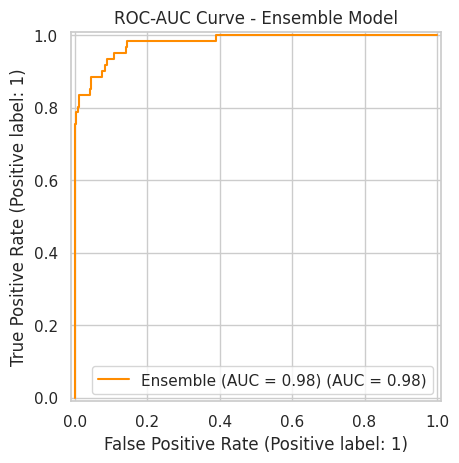

In [120]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt


# Get predicted probabilities for the positive class (class 1)
y_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]

# Compute AUC
auc_ensemble = roc_auc_score(y_test, y_proba_ensemble)

# Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_ensemble, name=f"Ensemble (AUC = {auc_ensemble:.2f})", color='darkorange')
plt.title("ROC-AUC Curve - Ensemble Model")
plt.grid(True)
plt.show()



**ROC-AUC observations**

- A high AUC (close to 1.0) indicates that the model is very good at distinguishing between the positive and negative classes.
- The steepness of the curve at the beginning suggests that the model can achieve a high true positive rate (TPR) with a very low false positive rate (FPR). This means it's very effective at identifying actual positive cases without incorrectly flagging too many negative cases.
- The fact that the curve stays near the top (TPR = 1.0) for a large portion of the FPR range further confirms its excellent discriminatory power.

**Overall Impression:** The ROC-AUC curve indicates that the Ensemble model has outstanding classification performance, demonstrating a strong ability to differentiate between the classes, with a very high balance of sensitivity and specificity.

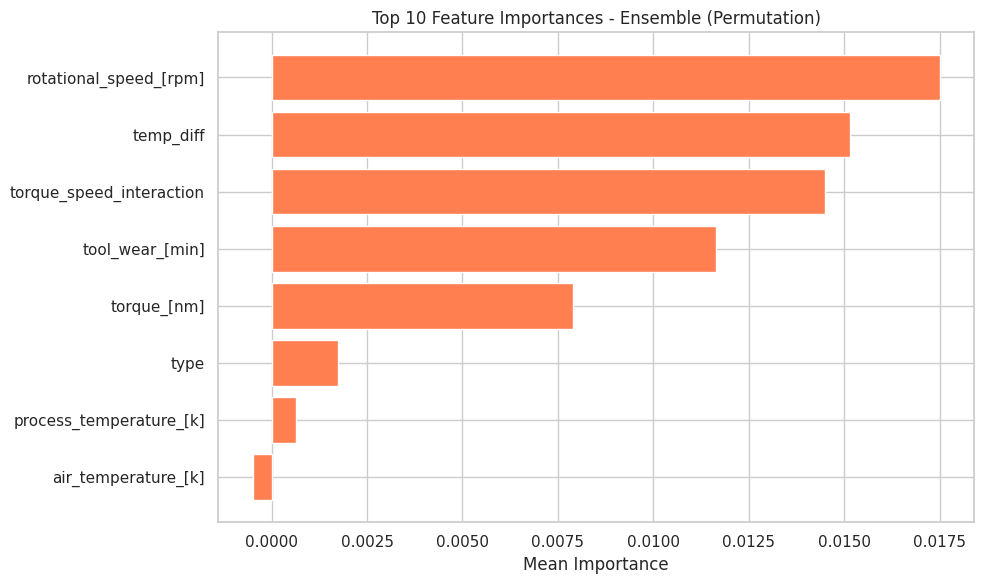

In [121]:
# If you used a scaler or transformation pipeline, your original column names are:
from sklearn.inspection import permutation_importance

feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature_{i}" for i in range(X.shape[1])]

# Compute permutation importance
result = permutation_importance(
    ensemble_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Create DataFrame
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='coral')
plt.xlabel("Mean Importance")
plt.title("Top 10 Feature Importances - Ensemble (Permutation)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations**

1. **Dominant Features:**

- rotational_speed_[rpm] is by far the most important feature, with the highest mean importance value (around 0.0175).
- temp_diff and torque_speed_interaction are also highly important, following rotational_speed_[rpm] closely.
- tool_wear_[min] and torque_[nm] are the next most important features, though with a noticeable drop in importance compared to the top three.

2. **Less Important Features (among the top 10):**
- type and process_temperature_[k] have very low mean importance values, almost negligible compared to the top features.
- air_temperature_[k] even shows a slightly negative mean importance, which can sometimes happen with permutation importance for very unimportant features due to randomness, suggesting it might not be relevant or could even be noise.

Overall: The plot clearly shows that a few features (rotational_speed_[rpm], temp_diff, torque_speed_interaction) are overwhelmingly more influential on the Ensemble model's predictions than the others. This information is crucial for understanding which inputs drive the model's decisions and for potential feature selection or engineering.

In [122]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# If y is binary (0 and 1), no need to one-hot encode
# But just to be safe:
y_train_nn = y_train.values if hasattr(y_train, 'values') else y_train
y_test_nn = y_test.values if hasattr(y_test, 'values') else y_test


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


In [124]:
history = nn_model.fit(
    X_train_scaled, y_train_nn,
    validation_data=(X_test_scaled, y_test_nn),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9046 - loss: 0.3254 - val_accuracy: 0.9695 - val_loss: 0.1354
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1468 - val_accuracy: 0.9710 - val_loss: 0.1056
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9664 - loss: 0.1171 - val_accuracy: 0.9730 - val_loss: 0.0943
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1067 - val_accuracy: 0.9750 - val_loss: 0.0874
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0948 - val_accuracy: 0.9740 - val_loss: 0.0855
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0889 - val_accuracy: 0.9755 - val_loss: 0.0806
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0869 - val_accuracy: 0.9755 - val_loss: 0.0791
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.0936 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.79      0.61      0.69        61

    accuracy                           0.98      2000
   macro avg       0.89      0.80      0.84      2000
weighted avg       0.98      0.98      0.98      2000



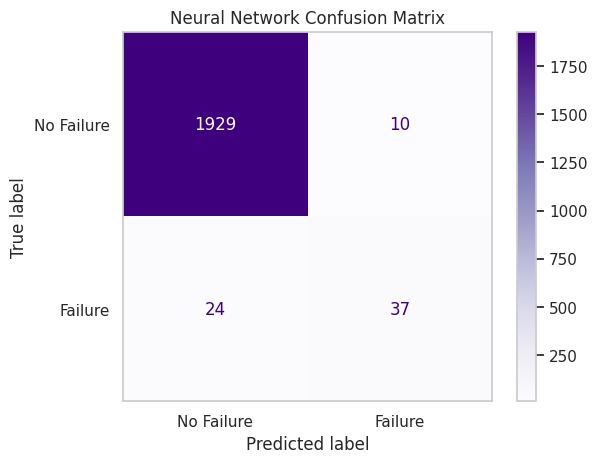

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict and threshold
y_pred_probs = nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_probs > 0.5).astype("int32")

# Classification report
print(classification_report(y_test_nn, y_pred_nn))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_nn, y_pred_nn, display_labels=["No Failure", "Failure"], cmap="Purples")
plt.title("Neural Network Confusion Matrix")
plt.grid(False)
plt.show()


**Neural Network Classification Report Insights**

**a) Recall**

1. Class 0 (Normal): 0.99
→ The model almost perfectly identified normal/no-failure cases.

2. Class 1 (Failure): 0.61
→ This is lower than the ensemble (0.75), XGBoost (0.74), and Random Forest (0.75), but better than SVM (0.57).
It means that 39% of actual failures are still being missed, which is a concern in predictive maintenance contexts.

**b) F1-Score**

1. Class 0: 0.99
→ Strong performance on the majority class, as expected.

2. Class 1: 0.69
→ Lower than ensemble (0.83), RF (0.82), and XGBoost (0.80), showing the neural network struggles to balance precision and recall on the failure class.

**c) Accuracy**

Although the overall accuracy is likely high (~99%), this metric is less meaningful due to the class imbalance.
What matters more here is that recall and F1-score for class 1 are comparatively lower, indicating that the neural network is not as effective at catching failures.



**Neural Netowrk Confusion Matrix Observations**

- True Negatives (No Failure correctly predicted as No Failure): 1929 instances. This is a high number, similar to the SVM model, indicating good performance in identifying "No Failure" cases.
- True Positives (Failure correctly predicted as Failure): 37 instances. This is a moderate number, better than SVM's 35 but lower than Random Forest (46) and XGBoost (45).
- False Positives (No Failure incorrectly predicted as Failure): 10 instances. This is the highest number of false positives among all models seen so far, tied with the SVM model. It means the Neural Network model incorrectly flagged "No Failure" as "Failure" 10 times.
- False Negatives (Failure incorrectly predicted as No Failure): 24 instances. This is the second-highest number of false negatives after the SVM's 26. It indicates that the model missed 24 actual "Failure" events.

Overall Comparison: The Neural Network model performs comparably to the SVM model, showing slightly better true positives for "Failure" but also a relatively high number of false positives and false negatives compared to the Random Forest, XGBoost, and especially the Ensemble models. It struggles more with correctly identifying "Failure" instances and is also more prone to misclassifying "No Failure" instances as "Failure" compared to the tree-based models.

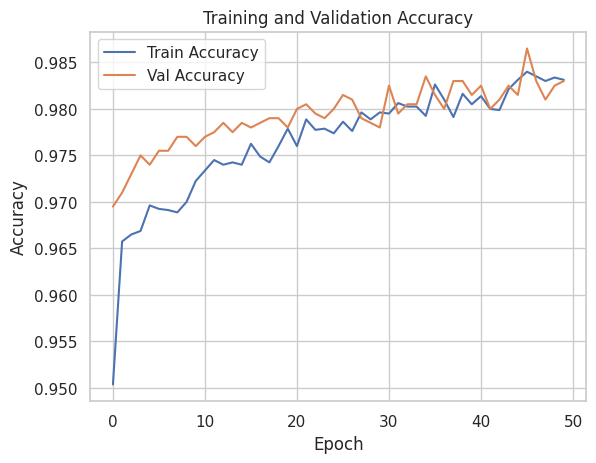

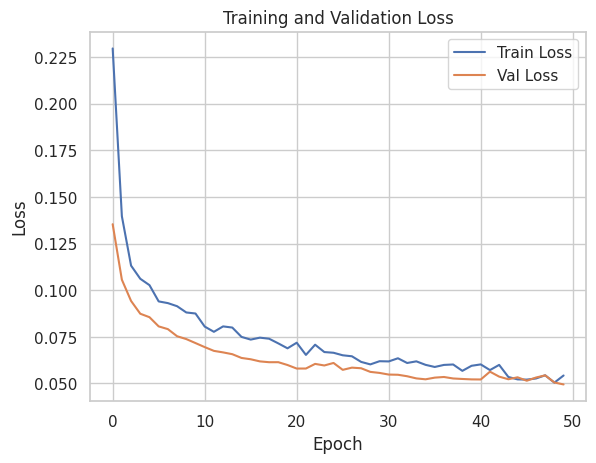

In [126]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**Observations for Training and Validation Accuracy:**

1. Initial Learning: Both training and validation accuracies increase rapidly in the first few epochs (0-5), indicating that the model is learning effectively from the data.

2. Convergence: Both curves continue to generally increase, though with more fluctuations, and appear to converge towards the upper end of the accuracy scale.

3. Gap between Curves:
- Initially, the validation accuracy is higher than the training accuracy for the first few epochs. This can sometimes happen due to factors like regularization, or if the training data is slightly harder for the model to fit perfectly early on.

- After about epoch 5, the training accuracy generally starts to catch up and even slightly surpass the validation accuracy at times.

- Throughout most of the training, the training and validation accuracies track each other quite closely, suggesting that the model is not severely overfitting. While the training accuracy often sits slightly below or fluctuates around the validation accuracy, there isn't a large, consistent divergence where training accuracy is significantly higher and validation accuracy plateaus or drops.

4. Fluctuations: Both curves show some fluctuations, especially after epoch 20-25. This is common during neural network training.

5. Peak Performance: Both accuracies reach their peak around epochs 40-45, with values approaching 0.985. They then slightly dip or stabilize towards the end.

Overall: The plot suggests a well-trained model. The close tracking of training and validation accuracy indicates good generalization capabilities and an absence of significant overfitting. The model achieves a high level of accuracy (around 98%) on both training and unseen validation data.

**Observations for Training Accuracy Vs Validations loss**

1. Initial Drop: Both training and validation losses decrease sharply in the initial epochs (0-5), signifying that the model is quickly learning and reducing its errors.

2. Continued Decrease and Stabilization: After the initial rapid drop, both curves continue to decrease, though at a slower pace. They tend to flatten out and stabilize towards the later epochs.

3. Relationship between Curves:

- For most of the training, the "Val Loss" is generally lower than the "Train Loss." This is a positive sign, as it suggests the model is generalizing well to unseen data and isn't severely overfitting. It implies that the model's performance on the validation set is slightly better than on the training set, or that the training data might be marginally more complex for the model to minimize error perfectly on.
- The two curves generally track each other quite closely, indicating a consistent learning trend without significant divergence.

4. Fluctuations: Minor fluctuations are visible in both loss curves, which is typical during the training of neural networks.

5. Convergence: Both losses appear to converge towards a low value, around 0.050 to 0.060 by the end of 50 epochs.

Overall: The plot indicates that the model is learning effectively and generalizing well. The consistent decrease in both training and validation loss, with the validation loss often being lower or very close to the training loss, suggests a well-tuned model that is not overfitting and is performing well on new data.

In [127]:
pip install keras-tuner --quiet


In [128]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=256, step=32),
                    activation='relu',
                    input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', 0.0, 0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units_hidden', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', 0.0, 0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [129]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='predictive_maintenance_nn',
    overwrite=True,
    seed=42
)


In [130]:
tuner.search(X_train_scaled, y_train_nn,
             validation_split=0.2,
             epochs=30,
             batch_size=32,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])


Trial 10 Complete [00h 00m 11s]
val_accuracy: 0.9731249809265137

Best val_accuracy So Far: 0.9793750047683716
Total elapsed time: 00h 03m 30s


In [131]:
# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Units Input: {best_hps.get('units_input')}")
print(f"Units Hidden: {best_hps.get('units_hidden')}")
print(f"Dropout 1: {best_hps.get('dropout_1')}")
print(f"Dropout 2: {best_hps.get('dropout_2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train_nn,
                         validation_data=(X_test_scaled, y_test_nn),
                         epochs=50,
                         batch_size=32,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
                         verbose=1)


Best Hyperparameters:
Units Input: 224
Units Hidden: 32
Dropout 1: 0.4
Dropout 2: 0.1
Learning Rate: 0.001
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9522 - loss: 0.2459 - val_accuracy: 0.9695 - val_loss: 0.1050
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1126 - val_accuracy: 0.9710 - val_loss: 0.0936
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.0956 - val_accuracy: 0.9730 - val_loss: 0.0872
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9684 - loss: 0.0937 - val_accuracy: 0.9760 - val_loss: 0.0794
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9706 - loss: 0.0868 - val_accuracy: 0.9720 - val_loss: 0.0811
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9724 - loss: 0.0778 - val_accuracy: 0.9760 - val_loss: 0.0732
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9761 - loss: 0.0712 - val_accuracy: 0.9780 - val_loss: 0.07

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
 Classification Report (Neural Network):

              precision    recall  f1-score   support

  No Failure       0.99      0.99      0.99      1939
     Failure       0.65      0.61      0.63        61

    accuracy                           0.98      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.98      0.98      0.98      2000



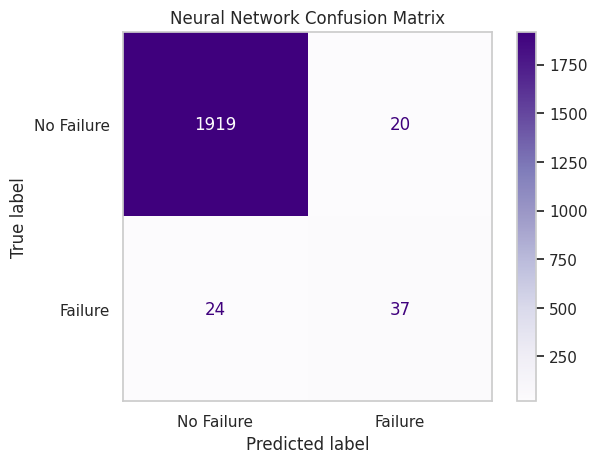

In [132]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities and convert to binary labels
y_pred_probs_nn = best_model.predict(X_test_scaled)
y_pred_nn = (y_pred_probs_nn > 0.5).astype("int32")

# Classification Report
print(" Classification Report (Neural Network):\n")
print(classification_report(y_test_nn, y_pred_nn, target_names=["No Failure", "Failure"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_nn, y_pred_nn,
                                        display_labels=["No Failure", "Failure"],
                                        cmap="Purples")
plt.title("Neural Network Confusion Matrix")
plt.grid(False)
plt.show()


**Observations:**

- True Negatives (No Failure correctly predicted as No Failure): 1919 instances. This is a high count, but slightly lower than some previous models (e.g., Random Forest's 1934, Ensemble's 1935).
- True Positives (Failure correctly predicted as Failure): 37 instances. This number is consistent with the previous Neural Network confusion matrix (image_ea0c7d.png) and is better than the SVM's 35, but still lower than Random Forest (46) and XGBoost (45).
- False Positives (No Failure incorrectly predicted as Failure): 20 instances. This is a significant increase in false positives compared to the previous Neural Network matrix (10), and much higher than Random Forest (5), XGBoost (7), and Ensemble (4). This means the model is now much more prone to incorrectly flagging "No Failure" cases as "Failure."
- False Negatives (Failure incorrectly predicted as No Failure): 24 instances. This number is consistent with the previous Neural Network matrix and remains relatively high, indicating the model still misses a notable number of actual "Failure" events.

Overall Comparison: Compared to the previous Neural Network confusion matrix (image_ea0c7d.png), this model shows a notable decrease in performance concerning false positives, which have doubled from 10 to 20. The true positives and false negatives remain the same. This indicates that this specific Neural Network configuration (or run) is less precise than its earlier counterpart, leading to more incorrect "Failure" alarms. It continues to perform worse than the Random Forest, XGBoost, and especially the Ensemble models in terms of correctly identifying "Failure" and minimizing misclassifications.

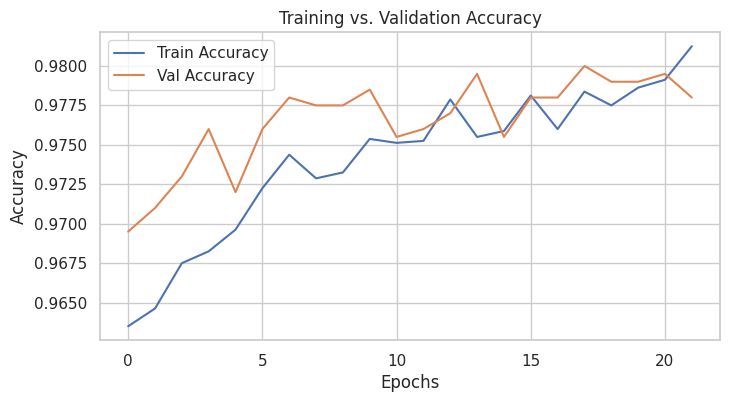

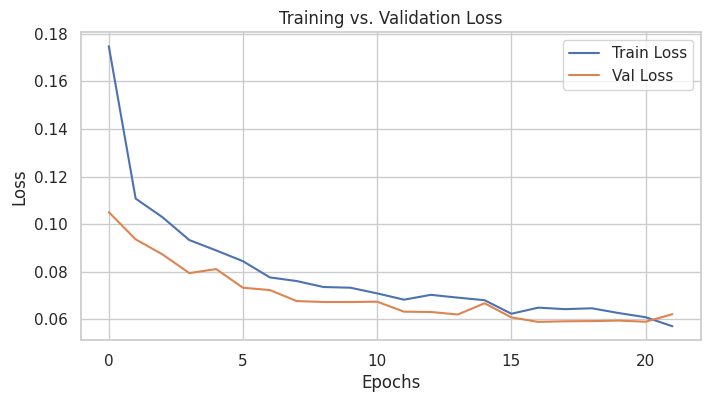

In [133]:
# Accuracy Plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


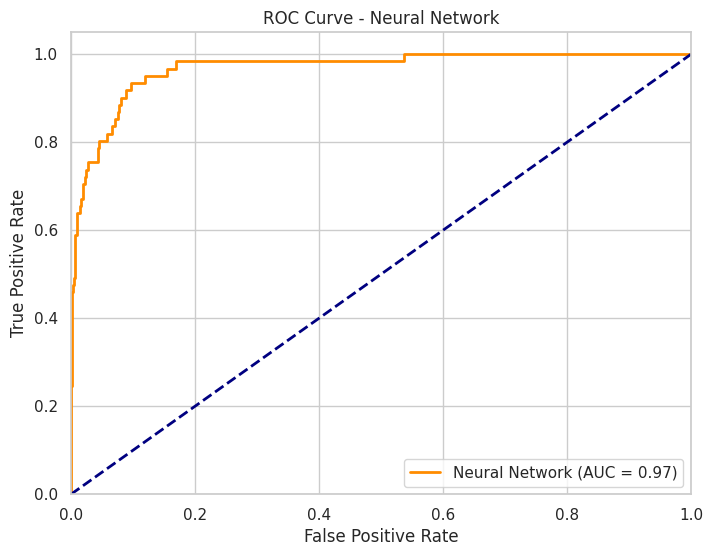

In [134]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_probs_nn = best_model.predict(X_test_scaled)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test_nn, y_pred_probs_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Neural Network (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Observations**
- An AUC of 0.97 is very high, indicating that the Neural Network model has excellent discriminatory power. It is very good at distinguishing between the positive and negative classes.
- The curve being significantly above the diagonal dashed line confirms that the model performs much better than random chance.
- The steep initial rise indicates that the model can achieve a high true positive rate while keeping the false positive rate very low, especially in the early part of the curve.
- Compared to the Ensemble model's AUC of 0.98, this Neural Network model performs almost as well, though marginally less effectively in terms of overall separability.

In [135]:
pip install shap --quiet


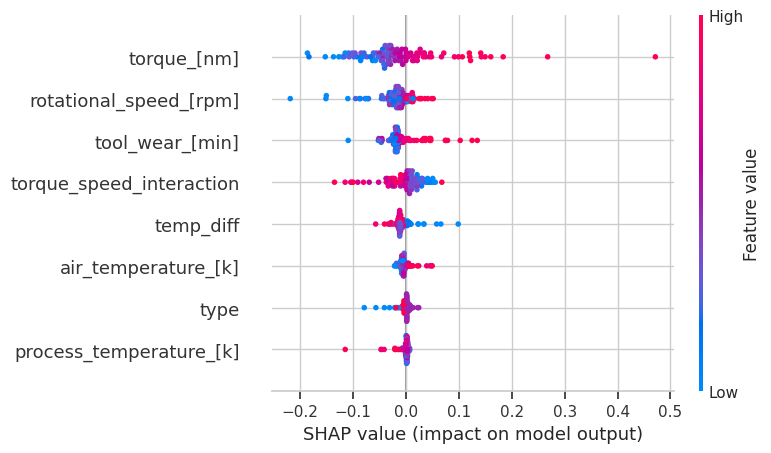

In [136]:
import shap

# Create an explainer
explainer = shap.Explainer(best_model, X_train_scaled, feature_names=feature_names)

# Calculate SHAP values for a sample
shap_values = explainer(X_test_scaled[:100])  # Limit to 100 samples for speed

# Summary plot
shap.summary_plot(shap_values, features=X_test_scaled[:100], feature_names=feature_names)


**Observations**

Key Interpretations from this Specific Plot:

1. torque_[nm]:

- High torque_[nm] values (red dots) generally have positive SHAP values, pushing the model's output higher.
- Low torque_[nm] values (blue dots) generally have negative SHAP values, pushing the model's output lower.
- This suggests that higher torque is associated with an increased likelihood of the positive class (e.g., "Failure" if that's the positive class).

2. rotational_speed_[rpm]:

- Similar to torque, high rotational_speed_[rpm] values (red dots) tend to have positive SHAP values, and low values (blue dots) tend to have negative SHAP values. This implies higher rotational speed also contributes to a higher model output.

3. tool_wear_[min]:

- High tool_wear_[min] values (red dots) mostly contribute positively to the model output.
- Low tool_wear_[min] values (blue dots) mostly contribute negatively. This makes intuitive sense for predicting failure, as more tool wear would likely increase the chance of failure.

4. torque_speed_interaction: Shows a similar pattern to torque and rotational_speed, where higher values lead to positive SHAP values.

5. temp_diff: Also follows the pattern of higher values leading to positive SHAP values.

6. air_temperature_[k] and type: These features show a mixed impact, with both high and low values having both positive and negative SHAP contributions, but generally clustered closer to zero SHAP values, indicating less consistent or weaker influence overall.

7. process_temperature_[k]: This feature has the least impact, with most SHAP values clustered around zero, indicating it has little influence on the model's predictions.

In [137]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class KerasBinaryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self.model.fit(X, y)

    def predict(self, X):
        preds = self.model.predict(X)
        return (preds > 0.5).astype("int32").ravel()

    def score(self, X, y):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y, self.predict(X))


In [138]:
# Wrap the trained model
wrapped_nn = KerasBinaryClassifier(best_model)

# Use permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(wrapped_nn, X_test_scaled, y_test_nn, n_repeats=10, random_state=42, scoring='accuracy')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━

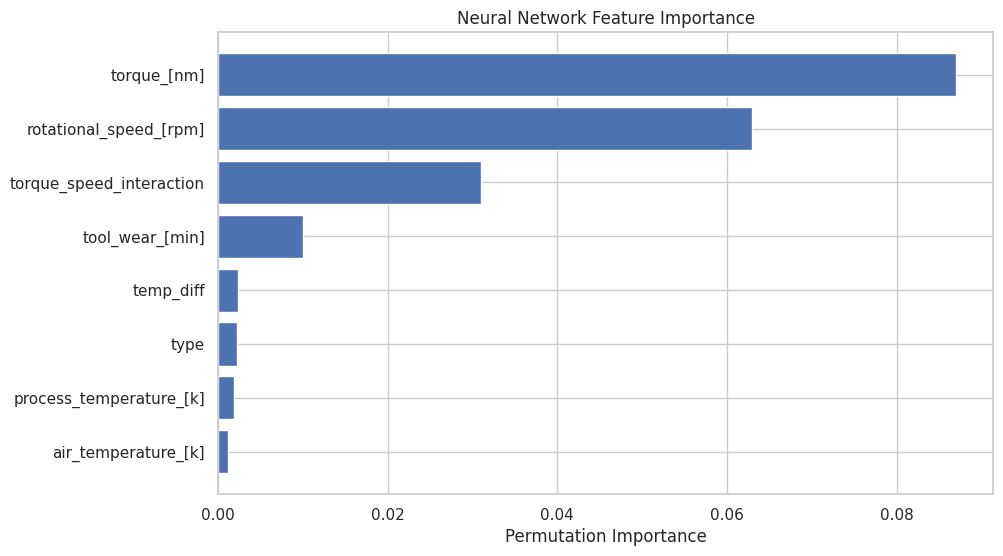

In [139]:
# Replace this with your actual feature names if you have them
feature_names = X.columns.tolist()

sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Neural Network Feature Importance")
plt.grid(True)
plt.show()


**Observations**

1. Top Important Features:
- torque_[nm] is clearly the most important feature, with the highest permutation importance (around 0.085).
- rotational_speed_[rpm] is the second most important, followed by torque_speed_interaction. These three features contribute significantly more than the others.

2. Moderately Important Features:
- tool_wear_[min] shows a noticeable, but much smaller, importance compared to the top three.

3. Least Important Features:
- temp_diff, type, process_temperature_[k], and air_temperature_[k] have very low permutation importance values, close to zero. This suggests they have minimal impact on the Neural Network's predictions.

# **Conclusions**

1. Ensemble Model Outperforms Neural Network
The ensemble model delivered superior performance across key metrics, especially for the minority class (failure):

- Recall (0.75): Higher than the neural network's (0.61), indicating better detection of failure events.

- F1-Score (0.83): Indicates a better balance between precision and recall.

- Accuracy (~99%): Maintained strong overall accuracy without sacrificing minority class detection.

- ROC-AUC: 98%: Demonstrates the model's strong ability to distinguish between failure and no-failure cases.

2. Effective Failure Detection with Fewer Errors
- The ensemble model produced fewer false positives and false negatives, making it more reliable in a predictive maintenance setting where missing a failure (false negative) could be costly or dangerous.

3. Neural Network Struggles with Class Imbalance
- Despite good performance on the majority class, the neural network underperformed on the failure class, making it less suitable when accurate fault detection is crucial.



# **Recommendations**

1. Adopt the Ensemble Model for Deployment

- Its consistent performance, particularly on minority (failure) cases, makes it ideal for real-world use where catching rare failures is critical.

2. Monitor for Model Drift

- Regularly retrain and validate the model with updated data to ensure continued accuracy, especially if failure patterns evolve.

3. Further Improvements

- Explore cost-sensitive learning or custom loss functions that penalize false negatives more heavily if needed.

- Use techniques like feature selection or domain-specific feature engineering to further refine model performance.

4. Implement Model Explainability

- Add explainability tools (e.g., SHAP, LIME) to understand which features drive failure predictions—useful for both maintenance teams and regulatory compliance.



# **Deployment**

1. Save  the Trained Model

- Save the model or keep it in memory for immediate use in Colab.

2. Define a Prediction Function

- Create a function that accepts input data, processes it and returns a predicted failure type.

3. Set Up Gradio Interface

- Define input components matching the model’s features (e.g., temperature, speed, torque).

- Set the output to return the predicted failure type.

4. Launch Gradio in Colab

- Use share=True in launch() so a public URL is generated.

- Gradio will automatically detect Colab and host the interface temporarily.

5. Test the Interface

- Open the generated Gradio *.gradio.live URL.

- Manually input values or test with sample input to verify predictions.

6. Deploy Permanently

- For long-term hosting, deploy the app to Hugging Face Spaces using gradio deploy.

In [166]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.4 MB/s eta 0:00:00


In [170]:
import joblib

# Load the trained ensemble model
model = joblib.load("ensemble_model.pkl")


In [171]:
def preprocess_input(input_dict):
    # Convert to DataFrame
    import pandas as pd
    df = pd.DataFrame([input_dict])

    # Any necessary preprocessing (must match training!)
    # For example: df = scaler.transform(df[important_features])
    return df


In [172]:
def predict(input_dict):
    processed = preprocess_input(input_dict)
    prediction = model.predict(processed)[0]
    return f"Predicted Failure Type: {prediction}"


In [177]:
important_features = [
    "air_temperature",
    "rotational_speed",
    "torque",
    "tool_wear",
    "type_H",
    "type_L",
    "type_M",
    "process_temperature",

]


In [179]:
import pandas as pd

def predict_failure(air_temp, rot_speed, torque, tool_wear,
                    type_h, type_l, type_m,
                    process_temp, failure_type_1, failure_type_0):

    # Build a single-row dataframe with correct column order
    input_data = pd.DataFrame([{
        "air_temperature": air_temp,
        "rotational_speed": rot_speed,
        "torque": torque,
        "tool_wear": tool_wear,
        "type_H": type_h,
        "type_L": type_l,
        "type_M": type_m,
        "process_temperature": process_temp,

    }])

    prediction = model.predict(input_data)[0]
    label = "Failure" if prediction == 1 else "No Failure"
    return f"Predicted: {label}"


In [181]:
import gradio as gr

iface = gr.Interface(
    fn=predict_failure,
    inputs=[
        gr.Number(label="Air Temperature"),
        gr.Number(label="Rotational Speed"),
        gr.Number(label="Torque"),
        gr.Number(label="Tool Wear"),
        gr.Radio([0, 1], label="Type H"),
        gr.Radio([0, 1], label="Type L"),
        gr.Radio([0, 1], label="Type M"),
        gr.Number(label="Process Temperature"),

    ],
    outputs="text",
    title="Predictive Maintenance - Failure Classifier"
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b5f7e665fffeb4b687.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
